<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/Dynamics_JammingTransition_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Dynamics of jamming transitions in complex networks</h1>
Pablo Echenique, Jes´us G´omez-Garde˜nes and Yamir Moreno</center>
<br>
Dated: 17 June, 2005
<b>
<center>
 <h3><u>Abstract</u><br></h3>
We numerically investigate jamming transitions in complex heterogeneous networks. Inspired
by Internet routing protocols, we study a general model that incorporates local traffic information
through a tunable parameter. The results show that whether the transition from a low-traffic regime
to a congested phase is of first or second order type is determined by the protocol at work. The
microscopic dynamics reveals that these two radically different behaviors are due to the way in which
traffic jams propagate through the network. Our results are discussed in the context of Internet
dynamics and other transport processes that take place on complex networks and provide insights
for the design of routing policies based on traffic awareness in communication systems.
</b></center>

##<u>Model</u>
<ul>
<li> At each time step, p information packets are created. The source of each packet as well as its
destination are chosen at random among all the nodes of
the network.</li>
<li> Each node i sends only one packet
at each time step and can
have a queue of $c_i$ packets to be delivered.</li>
<li>Suppose that
a node l is holding a packet whose destination is j. Then,
the effective distance between a neighbor i (i = 1, . . . , k_l)
of l and j is defined as
<center>
$\delta_i = hd_i + (1 − h)c_i$
</center>
where $d_i$ is the minimum number of hops one has to
pass by in order to reach j and h is a tunable parameter
that accounts for the degree of traffic awareness incorporated in the delivery algorithm</li>
<li> h = 1 referred to as standard protocol  and h $\neq$ 1, called traffic-aware scheme. It has been recently shown that the two described above give the best network’s performance when packets are only introduced
at the beginning of the process.  </li>
<li>In order to characterize the phase transition from a
free phase to a congested one, we introduce the order
parameter</li>
<center>
$\rho = \lim_{t \to \infty} \frac{A(t+\tau)-A(t)}{p\tau} $
</center>
where $\tau$ is the observation time, A(t) number of packets at time t and p is the number of packets created at  each time step. The $\rho$ measures the
ratio between the outflow and the inflow of packets during
a time window $\tau$, $\rho$ equals 0 and 1 implies minimal and maximal congestion respectively.
<li></li>
</ul>

##<u>Results</u>
<ul>
<li> For the standard protocol(h=1)
we get a smaller critical point($p_c$) and the jammed phase does
not appear suddenly. Hence, if we would like to have a
system in which traffic jams appear and grow smoothly,
the standard algorithm is the best choice.  </li>
<li>  On the contrary, we could implement a sort of traffic-aware protocol
if we are interested in delaying the appearance of congestion, however at the cost of a sudden jump to a highly
jammed phase due to the lack of previous warnings.</li>
</ul>

##<u>Summary</u>
The model provides useful insights for
the design of new routing policies and may be a guide for
more complex models where, for instance, routers can
tune h dynamically depending on the traffic conditions
at a local scale.

In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.1 MB/s 


In [ ]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import igraph as ig

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os

py_file_location = "/content/drive/My Drive/MS_thesis_work/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
import plotting_fun
import Queue_methods
import Graph_functions

In [ ]:
help(Graph_functions)

In [ ]:
adjacency_list=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/adjacency_list_SF_1000_nodes_m_5_seed_6")
node_Degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
nodes=len(adjacency_list.keys())

1000

In [ ]:
edges=Graph_functions.edges_from_adj_list(adjacency_list)

In [ ]:
nodes=5000
G_nx=nx.barabasi_albert_graph(nodes,m=5,seed=6)
adjacency_list,node_Degree_dict=Graph_functions.adjacency_list_nodeDegree(G_nx,nodes)


In [ ]:
G_ig = ig.Graph(directed=False)
G_ig.add_vertices(G_nx.nodes())
G_ig.add_edges(G_nx.edges())

In [ ]:
All_pairs_nodes={}
for source in range(nodes):
  target_list=[i for i in range(source,nodes)]
  path = G_ig.get_shortest_paths(v=source, to=target_list, weights=None,output='vpath')
  paths=[*path]
  for target,route in zip(target_list,paths):
    All_pairs_nodes[(source,target)]=route
#filename="/content/drive/MyDrive/MS_thesis_work/UnW_SP_ScaleFree_1000_nodes_4975_edges_m_5_seed_6"
#storeData(All_pairs_nodes,filename)

In [ ]:
SP_route_dict=All_pairs_nodes

In [ ]:
np.max(np.array([All_pairs_nodes[i] for i in  All_pairs_nodes]))

<ipython-input-12-992313cb4664>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.max(np.array([All_pairs_nodes[i] for i in  All_pairs_nodes]))


[4999]

In [ ]:
filename="/content/drive/MyDrive/MS_thesis_work/UnW_same_Orgn_dest_inclusive_SP_ScaleFree_1000_nodes_4975_edges_m_5_seed_6"

In [ ]:
SP_route_dict=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Dynamics_of_jammingTransistion_on_CN/UnW_same_Orgn_dest_inclusive_SP_ScaleFree_1000_nodes_4975_edges_m_5_seed_6")

In [ ]:
def order_para(TimeS,p,N):
   max_len=len(TimeS)
   order_para=[]
   for tau in np.array(np.arange(5,20,5)):
      value=0
      x=int(max_len)-int(max_len/10)
      y=int(x+tau)
      count=0
      while y<max_len:
        value+=(TimeS[y]-TimeS[x])/tau
        x=y
        y=int(y+tau)
        count+=1
      value=value/(count*N*p)
      order_para.append(value)
   return np.mean(np.array(order_para))
def Modified_SP_route(curr_node,destin_node,SP_route_dict):
  if curr_node<destin_node:
      route=SP_route_dict[(curr_node,destin_node)]
      route_=route.copy()
      #print(curr_node,destin_node,route_,"True")
  else:
      route=SP_route_dict[(destin_node,curr_node)]
      route_=route.copy()
      route_.reverse()
      #print(curr_node,destin_node,route_,"false")
  return route_
def  Determ_Echenique_protocol_1(pos,dest,adjacency_list,SP_route_dict,c,h):
     neig=[n for n in adjacency_list[pos]]
     if dest not in neig:
       H=np.array([(1-h)*c[i] + h*(len(Modified_SP_route(i,dest,SP_route_dict))-1)  for i in neig])
       index=np.argmin(H)
       value=H[index]
       index_arr=np.argwhere(H==value)
       nodes=[neig[i[0]] for i in index_arr]
       #print("possible nodes",nodes)
       return np.random.choice(nodes)
     else:
       return dest
def  Determ_Echenique_protocol_2(pos,dest,adjacency_list,SP_route_dict,c,h):
     neig=[n for n in adjacency_list[pos]]
     #print("neighbours",neig)
     occp_num=np.array([c[i] for i in neig])
     SP_pathlen=np.array([len(Modified_SP_route(i,dest,SP_route_dict))-1 for i in neig])
     H=h* SP_pathlen +(1.0-h)*occp_num
     #print("oocp_number",occp_num)
     #print("SP",SP_pathlen)
     #print(H)
     index=np.argmin(H)
     value=H[index]
     #print("v",value)
     index_arr=np.argwhere(H==value)
     nodes=[neig[i[0]] for i in index_arr]
     #print("possible nodes",nodes)
     return np.random.choice(nodes)
def creat_particles_probabilistically(nodes,p,Each_node_queue) :
    for node in range(nodes):
          rnum1=np.round(np.random.rand(1)[0],3)
          if rnum1<=p:
            create_particle=np.random.randint(0,nodes,1)[0]
            if create_particle !=node:
              Each_node_queue[node].enqueue([create_particle])
    return Each_node_queue
def creat_particles_deterministically(nodes,p,Each_node_queue):
    nodes_arr1=np.array([i for i in range(nodes)])
    nodes_set=set(nodes_arr1)
    origin=np.random.choice(nodes_arr1,size=p,replace=False,p=None)
    origin_set=set(origin)
    nodes_arr2=np.array(list(nodes_set.difference(origin_set)))
    dest=np.random.choice(nodes_arr2, size=p, replace=False, p=None)
    for i,j in zip(origin,dest):
              Each_node_queue[i].enqueue([j])
    return Each_node_queue
def creat_particles_determin(nodes,P,Each_node_queue):
    origin=np.random.choice(np.arange(nodes),size=P,replace=False,p=None)
    for node in origin:
      nodes_=[i for i in range(nodes)]
      nodes_.remove(node)
      dest=np.random.choice(np.array(nodes_))
      Each_node_queue[node].enqueue([dest])
    return Each_node_queue

In [ ]:
origin=np.random.choice(np.arange(10),size=5,replace=False,p=None)
origin

array([7, 3, 5, 9, 1])

In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [ ]:
birth_prob=np.array([i for i in range(50,150,20)])

In [ ]:
birth_prob

array([ 50,  70,  90, 110, 130])

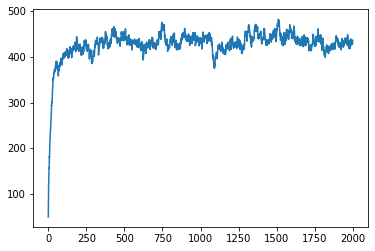

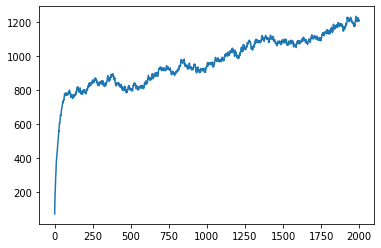

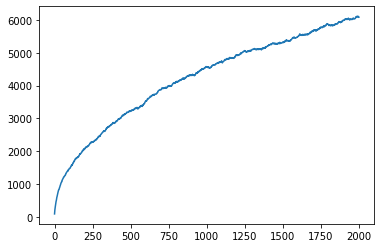

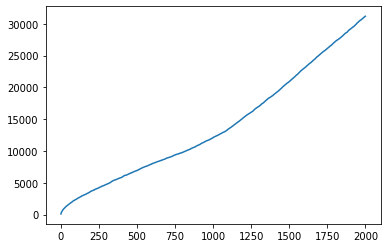

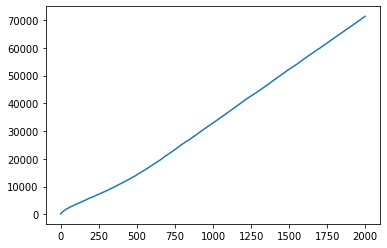

In [ ]:
op=[]
for p in birth_prob:
  Each_node_queue={}
  Each_node_TimeS={}
  for node in range(nodes):
    Each_node_queue[node]=Queue_methods.Queue_list()
    Each_node_TimeS[node]=[]
  Time=2000
  for time in range(Time):
        creat_particles_determin(nodes,p,Each_node_queue)
        walkers_on_nodes_dummy={i:Each_node_queue[i].queue_size() for i in range(nodes)}
        Each_node_queue_dummy={i:Queue_methods.Queue_list() for i in range(nodes)}
        for node in range(nodes):
            queue_size=Each_node_queue[node].queue_size()
            if queue_size>0:
                walker_out_dest=Each_node_queue[node].show()[0]
                choosen_node=Determ_Echenique_protocol_2(node,walker_out_dest,adjacency_list,SP_route_dict,walkers_on_nodes_dummy,0.95)
                expected_node=Modified_SP_route(node,walker_out_dest,SP_route_dict)
                #print("choosen node =",choosen_node,"Expected node =",expected_node[1])
                if choosen_node==walker_out_dest:
                    #print("destination reached",choosen_node,walker_out_dest)
                    Each_node_queue[node].dequeue()
                    #print("walker destroyed")
                else:
                    Each_node_queue[node].dequeue()
                    Each_node_queue_dummy[choosen_node].enqueue([walker_out_dest])
                    #print("walker transfered",node,choosen_node)
            else:
                #print("Node %d is empty",node)
                continue
                #print("Current node queue after changes",Each_node_queue[node].show())
                #print("dummy",[[i,Each_node_queue_dummy[i].show()] for i in range(nodes)])
        for node in range(nodes):
              Each_node_queue[node].enqueue(Each_node_queue_dummy[node].show())
              #print("Final queue of node",node,Each_node_queue[node].show())
              Each_node_TimeS[node].append(Each_node_queue[node].queue_size())
              #print(Each_node_TimeS[node])
  total_walkers_array=np.zeros(Time)
  for node in range(nodes):
      total_walkers_array+=np.array(Each_node_TimeS[node])
  plt.plot(total_walkers_array)
  plt.show()
  op.append(order_para(total_walkers_array,p,1))

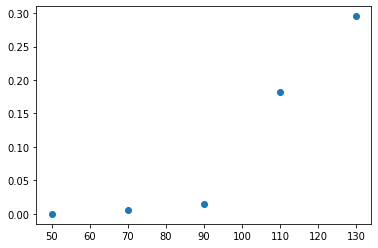

In [ ]:
plt.scatter(birth_prob, op)

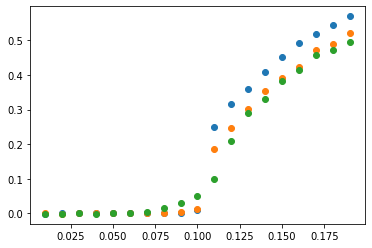

In [ ]:
plt.scatter(birth_prob,op1)
plt.scatter(birth_prob,op2)
plt.scatter(birth_prob,op3)

In [ ]:
Each_node_queue[2].show()

[895]

In [ ]:
walkers_on_nodes_dummy={i:Each_node_queue[i].queue_size() for i in range(nodes)}
walkers_on_nodes_dummy